In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv(r'D:\DATA ANALYTICS/Task2-Customer-Segmentation\data/Mall_Customers.csv')

df.head()

# Data Exploration
df.info()
df.describe()
df.isnull().sum()

# Data Cleaning (example)
# df['Age'].fillna(df['Age'].median(), inplace=True)

# Feature Selection
features = ['AnnualIncome', 'SpendingScore']  # Example features
X = df[features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Segment', data=df, palette='Set1')
plt.title('Customer Segmentation')
plt.show()

# Segment Insights
df.groupby('Segment').mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


KeyError: "None of [Index(['AnnualIncome', 'SpendingScore'], dtype='object')] are in the [columns]"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


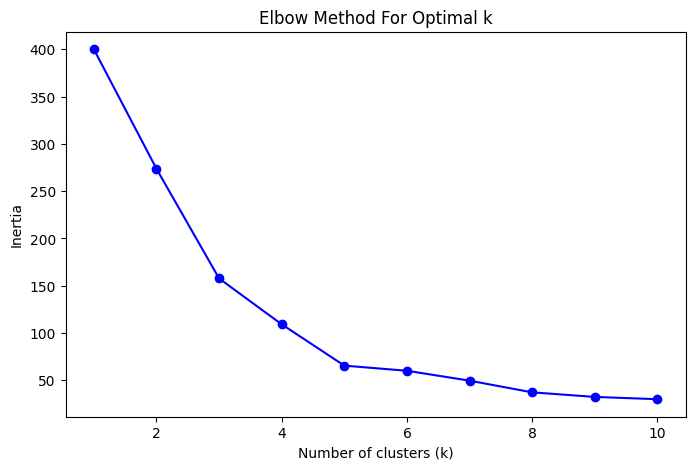

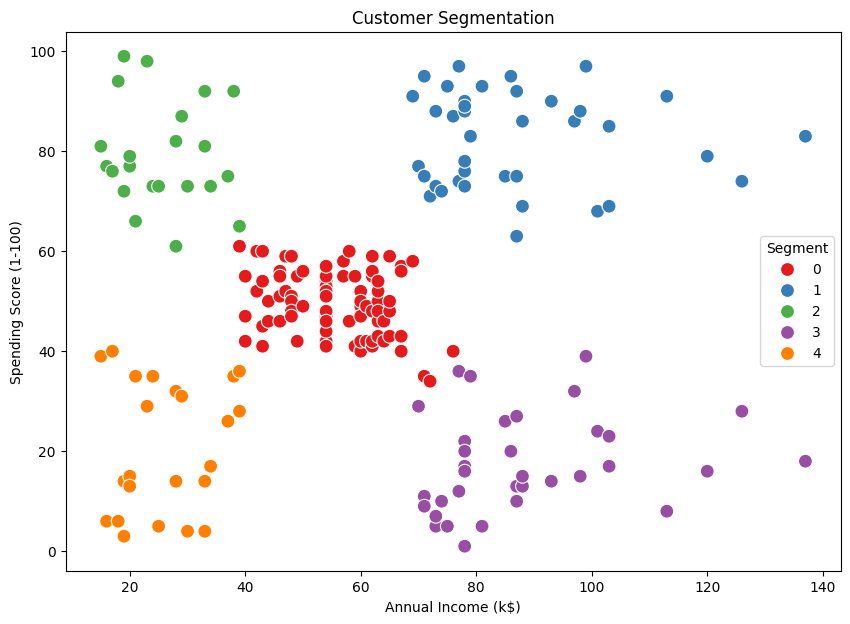

         Annual Income (k$)  Spending Score (1-100)
Segment                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [5]:
# ================================
# Task 2: Customer Segmentation
# Dataset: Mall_Customers.csv
# ================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 2️⃣ Load Data
df = pd.read_csv('../data/Mall_Customers.csv')
df.head()

# 3️⃣ Check Dataset Info
df.info()
df.describe()
df.isnull().sum()

# 4️⃣ Feature Selection
# Selecting features for clustering: Annual Income and Spending Score
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# 5️⃣ Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6️⃣ Determine optimal number of clusters using Elbow Method
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# 7️⃣ K-Means Clustering
# Using k=5 (or choose from elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# 8️⃣ Visualization of Segments
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Segment',
    palette='Set1',
    data=df,
    s=100
)
plt.title('Customer Segmentation')
plt.show()

# 9️⃣ Insights from Segments
segment_summary = df.groupby('Segment')[features].mean()
print(segment_summary)

# 10️⃣ Optional: Save Results
df.to_csv('../data/Mall_Customers_Segmented.csv', index=False)


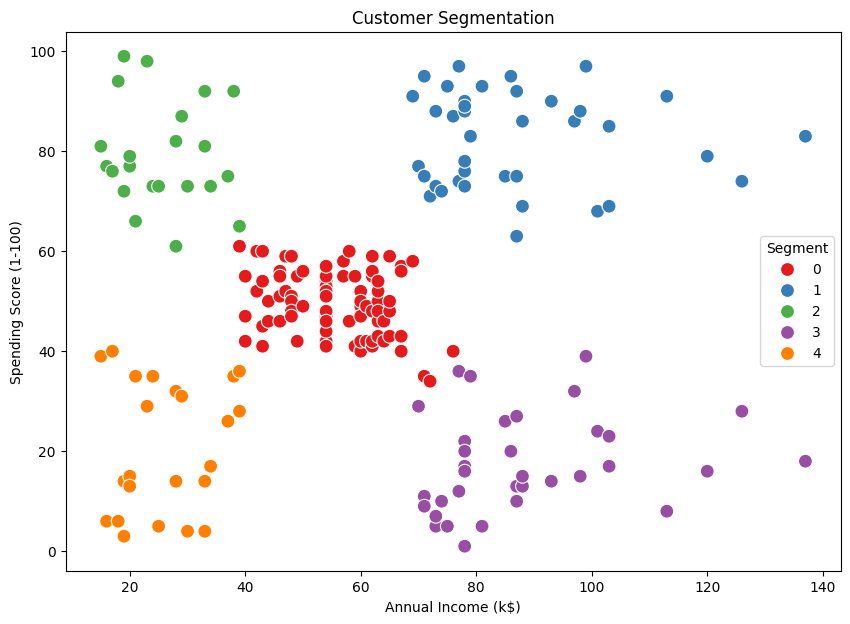

In [7]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Segment',
    palette='Set1',
    data=df,
    s=100
)
plt.title('Customer Segmentation')
plt.savefig('../reports/figures/customer_segments.png')  # Save figure for markdown
plt.show()


In [8]:
# Correlation between numerical features
corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()


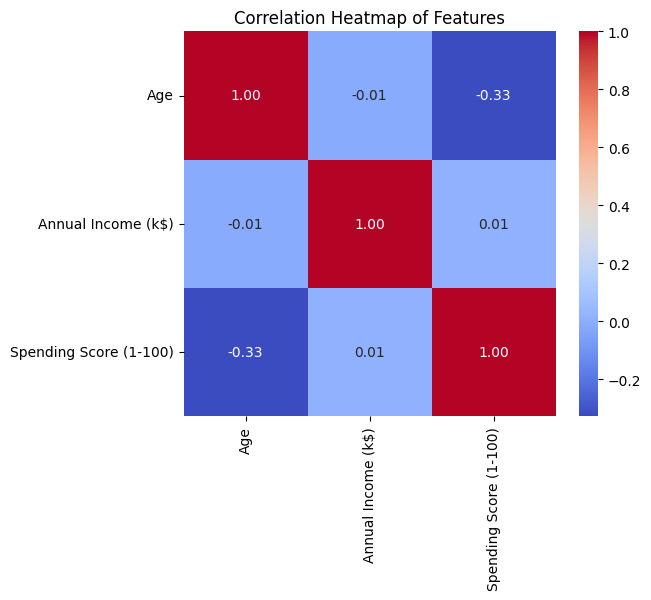

In [9]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


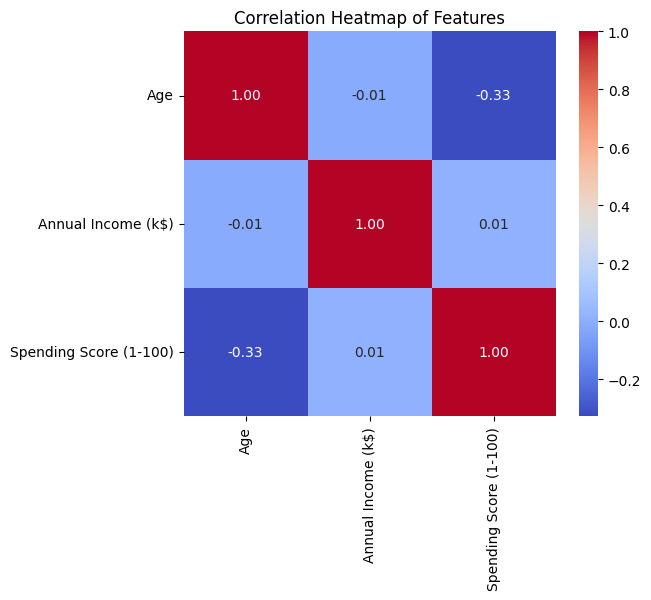

In [10]:
# Ensure folder exists
import os
os.makedirs('../reports/figures', exist_ok=True)

# Save figure
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.savefig('../reports/figures/heatmap.png')
plt.show()


C:\Users\Adiba Khan\AppData\Local\Temp\ipykernel_38492\692482605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')


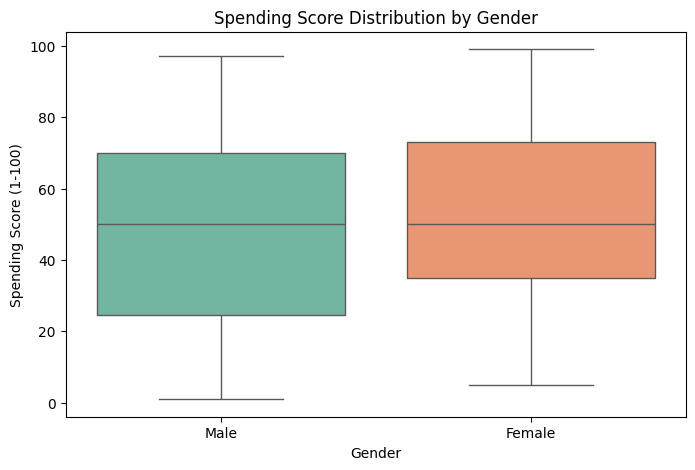

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title('Spending Score Distribution by Gender')
plt.show()


C:\Users\Adiba Khan\AppData\Local\Temp\ipykernel_38492\585454124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')


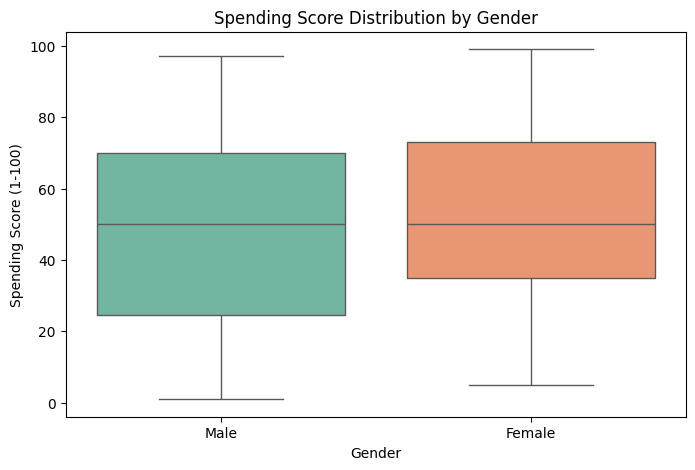

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title('Spending Score Distribution by Gender')
plt.savefig('../reports/figures/boxplot_spending_gender.png')
plt.show()


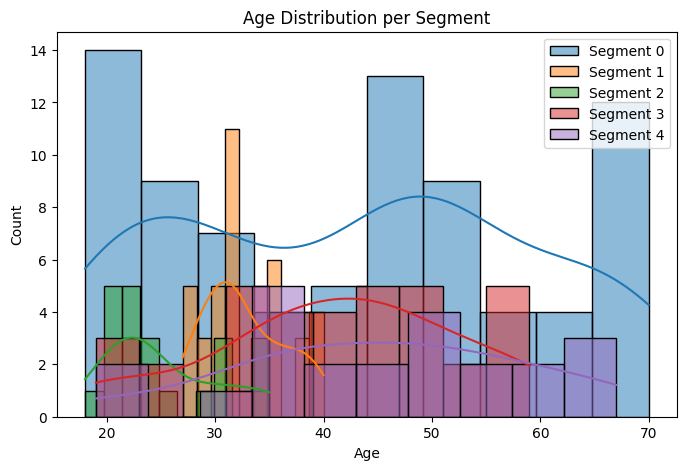

In [13]:
plt.figure(figsize=(8,5))
for segment in sorted(df['Segment'].unique()):
    sns.histplot(df[df['Segment']==segment]['Age'], label=f'Segment {segment}', kde=True, bins=10)
plt.title('Age Distribution per Segment')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


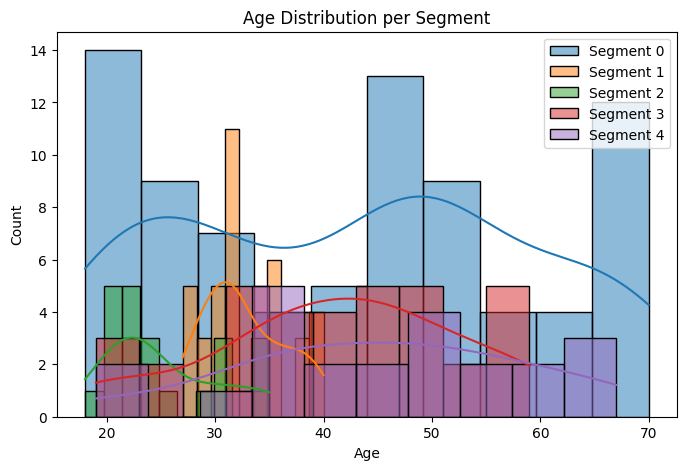

In [14]:
plt.figure(figsize=(8,5))
for segment in sorted(df['Segment'].unique()):
    sns.histplot(df[df['Segment']==segment]['Age'], label=f'Segment {segment}', kde=True, bins=10)
plt.title('Age Distribution per Segment')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.savefig('../reports/figures/age_distribution_segments.png')
plt.show()
